In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/raw_dataset.csv')

In [3]:
df.head()

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,10,0,0,0,10.0,NaN,NaN,21.0,False,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,6,0,0,0,5.0,NaN,NaN,20.0,False,0
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,0,5,0,0,5.0,NaN,NaN,19.0,False,0
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,4,0,0,0,6.0,NaN,NaN,21.0,False,0
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,0,3.0,NaN,NaN,33.0,False,0


## EDA

As a first approach, the following steps can be taken:

- View the df statistics, using describe()
- Make plots of different characteristics, such as region, dates, age ranges, etc.
- Make a profile of acceptance or rejection of the loan
- View possible correlation between variables

In [4]:
df.describe()

,loanKey,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,bad_flag
count,4157.000000,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,3909.000000,3507.000000,239.000000,4157.000000,4157.000000
mean,525386.651431,1.444444,0.733333,0.280000,1.184693,12.338225,0.018523,0.596103,3.755834,0.758239,0.019485,0.0,4.979023,578.911345,552.546610,34.561222,0.100313
std,202001.338206,0.900599,0.764572,0.502339,1.723715,9.902927,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,3.491556,48.989869,21.492840,10.834143,0.300453
min,58567.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,384.220628,485.874267,18.000000,0.000000
25%,363964.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,547.429791,535.545724,26.000000,0.000000
50%,543603.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,4.000000,588.531315,556.757944,32.000000,0.000000
75%,687271.000000,2.000000,1.000000,1.000000,2.000000,14.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,6.000000,612.323090,567.608057,41.000000,0.000000
max,884377.000000,7.000000,5.000000,3.000000,31.000000,80.000000,15.000000,81.000000,33.000000,35.000000,7.000000,0.0,21.000000,691.528420,603.311653,74.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loanKey              4157 non-null   int64  
 1   rep_loan_date        4157 non-null   object 
 2   first_loan           4157 non-null   object 
 3   dpd_5_cnt            675 non-null    float64
 4   dpd_15_cnt           675 non-null    float64
 5   dpd_30_cnt           675 non-null    float64
 6   first_overdue_date   675 non-null    object 
 7   close_loans_cnt      4142 non-null   float64
 8   federal_district_nm  4146 non-null   object 
 9   TraderKey            4157 non-null   int64  
 10  payment_type_0       4157 non-null   int64  
 11  payment_type_1       4157 non-null   int64  
 12  payment_type_2       4157 non-null   int64  
 13  payment_type_3       4157 non-null   int64  
 14  payment_type_4       4157 non-null   int64  
 15  payment_type_5       4157 non-null   i

So the first thing we should do is to drop the colunms that have less than half of the data:

- dpd_5_cnt

- dpd_15_cnt

- dpd_30_cnt

- first_overdue_date

- score_2

In [6]:
cols_drop= ['dpd_5_cnt','dpd_15_cnt','dpd_30_cnt','first_overdue_date','score_2']

df = df.drop(cols_drop,axis=1)

In [7]:
df.head(10)

,loanKey,rep_loan_date,first_loan,close_loans_cnt,federal_district_nm,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,age,gender,bad_flag
0,708382,2016-10-06,2015-11-13,3.0,region_6,6,0,0,10,0,0,0,10.0,NaN,21.0,False,0
1,406305,2016-03-26,2015-09-28,0.0,region_6,6,0,0,6,0,0,0,5.0,NaN,20.0,False,0
2,779736,2016-10-30,2015-12-21,2.0,region_1,6,0,0,0,5,0,0,5.0,NaN,19.0,False,0
3,556376,2016-06-29,2015-06-30,1.0,region_6,14,0,0,4,0,0,0,6.0,NaN,21.0,False,0
4,266968,2015-12-01,2015-08-03,0.0,region_5,22,0,3,0,0,0,0,3.0,NaN,33.0,False,0
5,697186,2016-10-01,2015-08-30,2.0,region_3,38,0,0,6,0,0,0,5.0,NaN,34.0,False,0
6,347907,2016-02-18,2015-06-07,2.0,region_3,6,0,0,9,0,0,0,8.0,NaN,32.0,False,0
7,256097,2015-11-23,2015-06-04,0.0,region_3,6,0,0,5,0,0,0,5.0,NaN,23.0,False,1
8,670540,2016-09-19,2015-12-03,1.0,region_2,6,0,0,4,0,0,0,6.0,NaN,33.0,False,0
9,254453,2015-11-22,2015-06-04,0.0,region_3,6,0,0,5,0,0,0,5.0,NaN,23.0,False,1


As we dont have any information about the differents variables, lets suppose:

- LoanKey and TraderKey are the Id's for the loan and the trader who managed that loan. So probably this data doesn't give us so much information. 

We can use the information from some columns to do feature engineering:

- Convert 'federal_district_nm', 'gender' to int type, and 'rep_loan_date', 'first_loan' to datetime, to get the difference in days, between the first loan an the rep loan.

In [8]:
df['rep_loan_date'] = pd.to_datetime(df['rep_loan_date'])
df['first_loan'] = pd.to_datetime(df['first_loan'])

In [9]:
df['diff_loans'] = df['rep_loan_date'] - df['first_loan']
df['diff_loans']=df['diff_loans'].dt.days.astype(int)

df.dropna(subset=['federal_district_nm'], inplace=True)
df['federal_district_nm'] = df['federal_district_nm'].replace('region_','',regex=True).astype(int)

df['score_1'].fillna(df['score_1'].mean(), inplace=True)
df['gender'] = df['gender'].astype(int)

In [10]:
df.head()

,loanKey,rep_loan_date,first_loan,close_loans_cnt,federal_district_nm,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,age,gender,bad_flag,diff_loans
0,708382,2016-10-06,2015-11-13,3.0,6,6,0,0,10,0,0,0,10.0,578.964683,21.0,0,0,328
1,406305,2016-03-26,2015-09-28,0.0,6,6,0,0,6,0,0,0,5.0,578.964683,20.0,0,0,180
2,779736,2016-10-30,2015-12-21,2.0,1,6,0,0,0,5,0,0,5.0,578.964683,19.0,0,0,314
3,556376,2016-06-29,2015-06-30,1.0,6,14,0,0,4,0,0,0,6.0,578.964683,21.0,0,0,365
4,266968,2015-12-01,2015-08-03,0.0,5,22,0,3,0,0,0,0,3.0,578.964683,33.0,0,0,120


Let's see the the months with the highest number of rep loans:

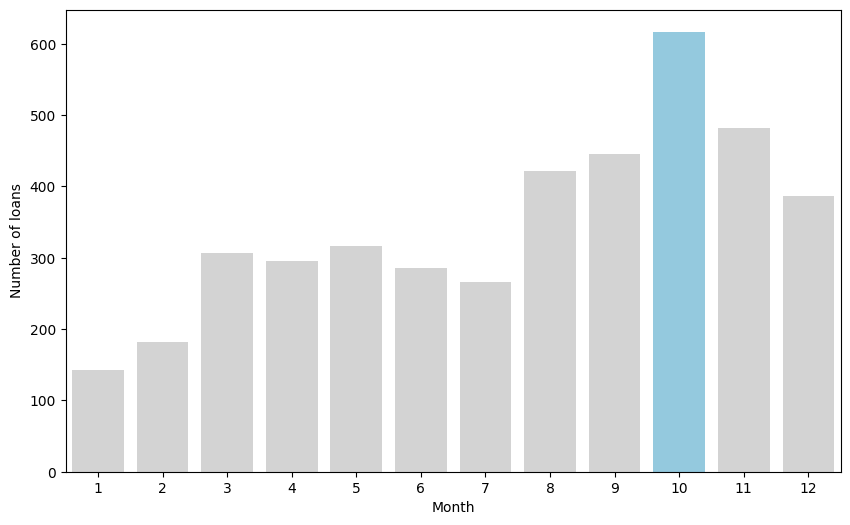

In [11]:
loan_counts_by_month = df.rep_loan_date.dt.month.value_counts()
loan_counts_by_month = loan_counts_by_month.sort_index()
max_index = loan_counts_by_month.idxmax()
colors = ["skyblue" if index == max_index else "lightgrey" for index in loan_counts_by_month.index]

plt.figure(figsize=(10, 6))  
sns.barplot(x=loan_counts_by_month.index, y=loan_counts_by_month.values, palette=colors)
plt.xlabel("Month")
plt.ylabel("Number of loans")

plt.show()

What year were the most loans taken out?

In [12]:
df.rep_loan_date.dt.year.value_counts()

rep_loan_date
2016    3414
2015     726
2017       6
Name: count, dtype: int64

Let's look at the difference between loans by gender:

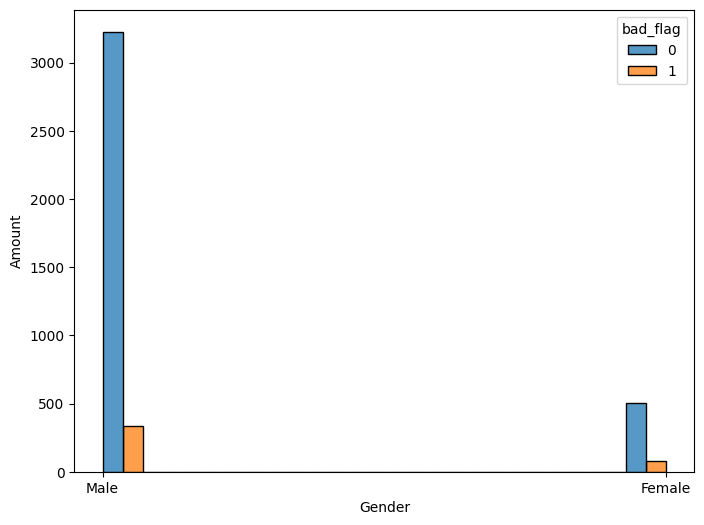

In [13]:

gender_labels = {0: 'Male', 1: 'Female'}

plt.figure(figsize=(8, 6)) 
sns.histplot(data=df, x='gender', hue='bad_flag', multiple="dodge")
plt.xlabel("Gender")
plt.ylabel("Amount")
plt.xticks(ticks=[0, 1], labels=[gender_labels[0], gender_labels[1]])
plt.show()

In percentaje, with gender=0 as male and gender=1 as female, the percentaje of loans accepted is:

In [15]:
print(df.groupby('gender')['bad_flag'].mean() * 100)

gender
0     9.353933
1    13.993174
Name: bad_flag, dtype: float64


Let's look at the difference between loans by region:

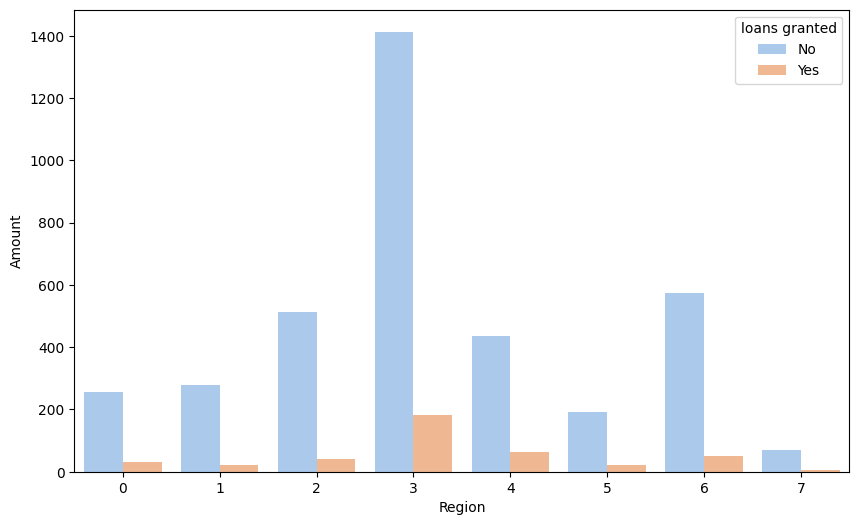

In [ ]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
sns.countplot(data=df, x='federal_district_nm', hue='bad_flag', palette='pastel')
plt.xlabel("Region")
plt.ylabel("Amount")
plt.legend(title="loans granted", labels=["No", "Yes"])
plt.show()

As a percentage, the loans granted by region are:

In [ ]:
print('----------------Number of loans by region-------------------------')
print(df.federal_district_nm.value_counts())
print('----------------As a percentage of positive loans------------------')
print(df.groupby('federal_district_nm')['bad_flag'].mean() * 100)



----------------Number of loans by region-------------------------
federal_district_nm
3    1595
6     627
2     553
4     499
1     300
0     285
5     213
7      74
Name: count, dtype: int64
----------------As a percentage of positive loans------------------
federal_district_nm
0    10.526316
1     7.333333
2     7.414105
3    11.410658
4    12.424850
5     9.859155
6     8.293461
7     6.756757
Name: bad_flag, dtype: float64


As we can see, regions 0, 3 and 4 have the highest percentages of loans grant. 

In [ ]:
df.corr().transpose()

,loanKey,rep_loan_date,first_loan,close_loans_cnt,federal_district_nm,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,age,gender,bad_flag,diff_loans
loanKey,1.000000,0.988852,0.578172,0.227864,0.055919,-0.029281,-0.006212,0.025458,0.218669,0.132264,0.018484,NaN,0.315571,0.016232,0.044058,0.022024,-0.110670,0.361679
rep_loan_date,0.988852,1.000000,0.583728,0.228743,0.058212,-0.028797,-0.008428,0.028540,0.223566,0.140008,0.019236,NaN,0.323335,0.017475,0.048934,0.020859,-0.116960,0.366858
first_loan,0.578172,0.583728,1.000000,-0.361883,0.095376,0.003444,-0.025066,-0.164428,-0.340105,-0.044080,-0.030246,NaN,-0.464937,-0.045814,0.041489,0.066443,-0.003015,-0.541193
close_loans_cnt,0.227864,0.228743,-0.361883,1.000000,-0.024854,0.018993,0.066806,0.217962,0.538279,0.280679,0.051194,NaN,0.729866,0.017756,-0.030978,-0.029296,-0.070803,0.651482
federal_district_nm,0.055919,0.058212,0.095376,-0.024854,1.000000,0.083935,-0.019259,-0.011720,-0.038661,0.012640,-0.017759,NaN,-0.042913,-0.020887,-0.017872,0.016693,-0.002110,-0.048988
TraderKey,-0.029281,-0.028797,0.003444,0.018993,0.083935,1.000000,0.014897,0.056467,-0.088305,0.072545,0.003232,NaN,-0.039624,0.007179,-0.025487,0.010146,-0.013604,-0.033769
payment_type_0,-0.006212,-0.008428,-0.025066,0.066806,-0.019259,0.014897,1.000000,0.017077,-0.024353,0.029907,-0.004327,NaN,0.035009,0.012133,-0.007150,0.010711,0.020149,0.019990
payment_type_1,0.025458,0.028540,-0.164428,0.217962,-0.011720,0.056467,0.017077,1.000000,-0.135230,-0.015033,0.117994,NaN,0.239501,-0.021573,-0.047154,-0.018410,-0.011377,0.217948
payment_type_2,0.218669,0.223566,-0.340105,0.538279,-0.038661,-0.088305,-0.024353,-0.135230,1.000000,-0.239480,-0.039777,NaN,0.708522,0.035752,0.078976,-0.045549,-0.062039,0.621206
payment_type_3,0.132264,0.140008,-0.044080,0.280679,0.012640,0.072545,0.029907,-0.015033,-0.239480,1.000000,-0.000511,NaN,0.235199,0.009793,-0.103181,0.012516,-0.065681,0.195504


Finally we will separate the months and years of the first and the rep loan into four new columns and save the new Dataframe:

In [ ]:
df.head()

,loanKey,rep_loan_date,first_loan,close_loans_cnt,federal_district_nm,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,age,gender,bad_flag,diff_loans
0,708382,2016-10-06,2015-11-13,3.0,6,6,0,0,10,0,0,0,10.0,578.964683,21.0,0,0,328
1,406305,2016-03-26,2015-09-28,0.0,6,6,0,0,6,0,0,0,5.0,578.964683,20.0,0,0,180
2,779736,2016-10-30,2015-12-21,2.0,1,6,0,0,0,5,0,0,5.0,578.964683,19.0,0,0,314
3,556376,2016-06-29,2015-06-30,1.0,6,14,0,0,4,0,0,0,6.0,578.964683,21.0,0,0,365
4,266968,2015-12-01,2015-08-03,0.0,5,22,0,3,0,0,0,0,3.0,578.964683,33.0,0,0,120


In [ ]:
df['First loan year']=df.first_loan.dt.year
df['Rep loan year']=df.rep_loan_date.dt.year
df['First loan month']=df.first_loan.dt.month
df['Rep loan month']=df.rep_loan_date.dt.month

In [ ]:
df.drop('rep_loan_date',inplace=True,axis=1)
df.drop('first_loan',inplace=True,axis=1)
df.drop('loanKey',inplace=True,axis=1)

Fill NA values

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.to_csv('../datasets/clean_dataset.csv', index=False)